### Student Details

Student Name: Muhammad Khubaib Akram

Student ID:23098929

# Task 2: Probability Theory

## Option ? (which option did you pick?)

(Describe the task)

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

## Manual Calculations

(Provide details of the manual calculations)

In [ ]:
# Your code

## An example 1: A gamble is placed depending on the result of the dice.

This result of a dice roll is a uniform distribution, as all dice outcomes are equally likely; 1/6 probablility
The result is discrete as the result of a dice throw can only take on values of: 1,2,3,4,5,6

* if dice = 1,2,3 will lose -1
* if dice = 4 will draw, 0
* if dice = 5 will win, 1
* if dice = 6 will win, 2
* We know this is a fair game theoretically, but what will the simulations show?

Simulate 1000 dice results and record both the result of the dice, and the result of the gamble.
To then calculate the expected value & standard deviation of both the result of the dice and the result of the gamble.


Finally plot the frequency of the dice rolls & plotting the frequency of the gamble result.

In [3]:
## Libraries
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

Dice Results Expected Value:  3.589
Dice Results Std deviation:  1.7589994314950759
Gamble Results Expected Value:  0.093
Gamble Results Std Deviation:  1.1791314600162273


Text(0, 0.5, 'Score')

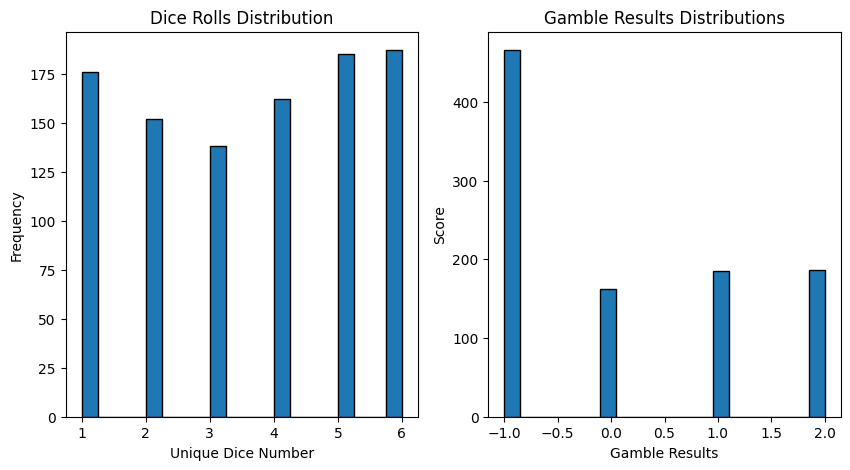

In [23]:


diceResults = []
gambleResults = []

# Calculting the Gamble results and recording both roll dice and gamble results
for count in range(0,1000):
  roll =  random.randint(1,6)
  diceResults.append(roll)

  if roll == 1 or roll == 2 or roll ==3:
    gambleResults.append(-1)
  elif roll == 4:
    gambleResults.append(0)
  elif roll == 5:
    gambleResults.append(1)
  else:
    gambleResults.append(2)

diceArr = np.array(diceResults)
gambleArr = np.array(gambleResults)

print("Dice Results Expected Value: ", np.mean(diceArr))
print("Dice Results Std deviation: ", np.std(diceArr))

diceResultsUnique, diceResultsFrequency = np.unique(diceArr, return_counts=True) # Getting Frequencey of DiceResults

# Getting Frequency of Gamble Results
gambleResultsUnique, gambleResultsFrequency = np.unique(gambleArr, return_counts= True)

# Expected value of Gamble Results
print("Gamble Results Expected Value: ", np.mean(gambleArr))

# Standard Deviation of Gamble Results
print("Gamble Results Std Deviation: ", np.std(gambleArr))

#Subplot for Dice Rolls
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(diceResultsUnique, bins=20, weights = diceResultsFrequency, edgecolor='black')
plt.title('Dice Rolls Distribution')
plt.xlabel('Unique Dice Number')
plt.ylabel('Frequency')

#SubPlots for Gamble Results
plt.subplot(1,2,2)
plt.hist(gambleResultsUnique, bins=20, weights = gambleResultsFrequency, edgecolor='black')
plt.title('Gamble Results Distributions')
plt.xlabel('Gamble Results')
plt.ylabel('Score')

## Example 2 with normal distribution
**Problem**: The weight of a randomly selected apple from a farm is measured. The random variable is the weight in grams. This is a continuous random variable that follows a normal distribution with mean 150 and standard deviation 20.

**Scenario**: The farm owner wants to sell the apples in different categories based on their weight. He decides to use the following criteria:

* If the weight is less than 120 grams, the apple is considered too small and discarded.
* If the weight is between 120 and 180 grams, the apple is sold for $0.5 per gram.

* If the weight is more than 180 grams, the apple is sold for $0.8 per gram.

**Question**: How much revenue can the farm owner expect to make from selling 10000 apples?

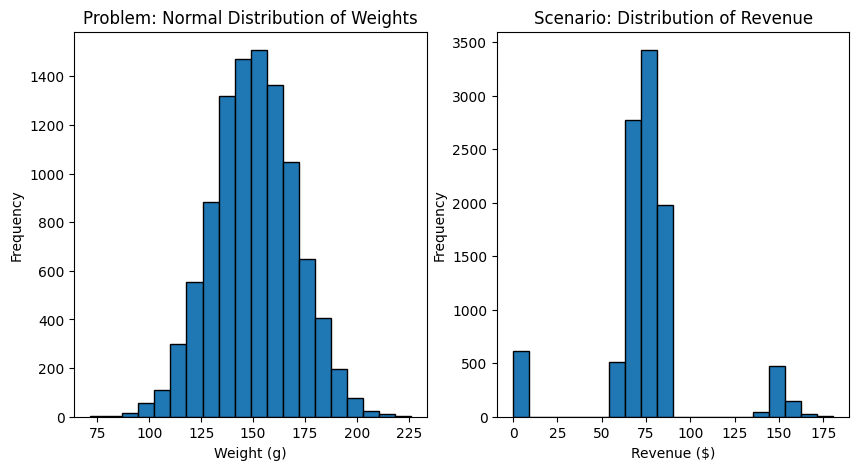

In [5]:

mean = 150
sd = 20
num_sim = 10000

results = np.random.normal(mean, sd, num_sim) # generate an array of num_sim outcomes from the normal distribution
revenue = np.zeros(num_sim) # create an array of zeros to store the revenue for each apple

# Loop through the results and calculate the revenue based on the criteria
for i in range(num_sim):

  if results[i] < 120:
    revenue[i] = 0

  elif results[i] <= 180:
    revenue[i] = results[i] * 0.5

  else:
    revenue[i] = results[i] * 0.8

# Plot the distribution of weights and revenues

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(results, bins=20, edgecolor='black')
plt.title('Problem: Normal Distribution of Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(revenue, bins=20, edgecolor='black')
plt.title('Scenario: Distribution of Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')

plt.show()

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import pandas as pd
#import io

#df = pd.read_csv(io.BytesIO(uploaded['01_heights_weights_genders.csv']))
#print(df)

In [ ]:
# import dependencies
import numpy as np
import pandas
import matplotlib.pyplot as plt
# Read the data from the .csv, using the first row as the headers of the data
!wget https://github.com/johnmyleswhite/ML_for_Hackers/blob/master/05-Regression/data/01_heights_weights_genders.csv
#filePath = "C:/Users/Intel//Downloads/eircode.csv"

data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=5)

--2023-09-23 22:23:49--  https://github.com/johnmyleswhite/ML_for_Hackers/blob/master/05-Regression/data/01_heights_weights_genders.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484124 (473K) [text/plain]
Saving to: ‘01_heights_weights_genders.csv.2’

01_heights_weights_ 100%[===================>] 472.78K  --.-KB/s    in 0.03s   

2023-09-23 22:23:49 (17.1 MB/s) - ‘01_heights_weights_genders.csv.2’ saved [484124/484124]



,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Visualise

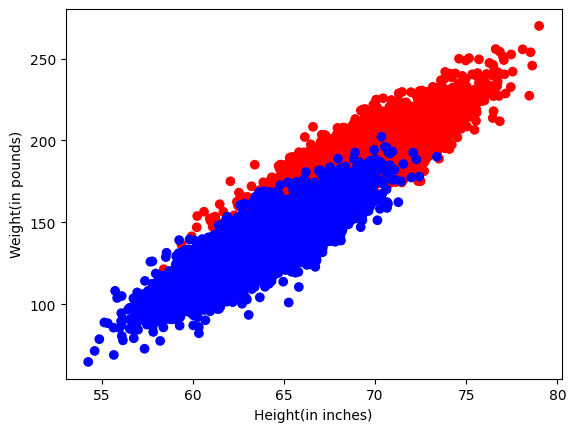

In [ ]:
################################
# Your code here
colors ={"Male" : "red", "Female" : "blue"}

#data.plot(kind="scatter", x= "Height", y="Weight", c=data.Gender.map(colors))
plt.scatter(data.Height, data.Weight, c=data.Gender.map(colors))
plt.xlabel("Height(in inches)")
plt.ylabel("Weight(in pounds)")
plt.show()

###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
################################
# Your code here
from sklearn.model_selection import train_test_split   # Notice the new way of pulling in the module?

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB

################################
# Your code here

# Here we are training our model ... use the training data
gender_model = GaussianNB().fit(X_train, y_train) #fitting our model

### Test the algorithm
Using the test data

In [ ]:
from sklearn.metrics import accuracy_score

################################
# Your code here
# Now let us predict using the modle and our dataset

y_pred = gender_model.predict(X_test) #now predicting our model to our test dataset

print(X_test)
print()
print(y_pred)
print(y_test.values)


# Check the accuracy by comparing our known test data gender with the predicted gender
accuracy_score = accuracy_score(y_test, y_pred)
print (accuracy_score)

         Height      Weight
9620  66.915077  144.766235
1725  68.031172  176.665353
1614  65.710600  170.900677
9777  62.555425  144.299190
5578  66.004999  146.668808
...         ...         ...
9838  63.378099  126.545740
2454  66.454441  162.811082
4363  75.044486  222.034565
6458  64.751936  138.393177
735   70.605761  197.341247

[3300 rows x 2 columns]

['Female' 'Male' 'Male' ... 'Male' 'Female' 'Male']
['Female' 'Male' 'Male' ... 'Male' 'Female' 'Male']
0.8866666666666667


### Plot the random samples

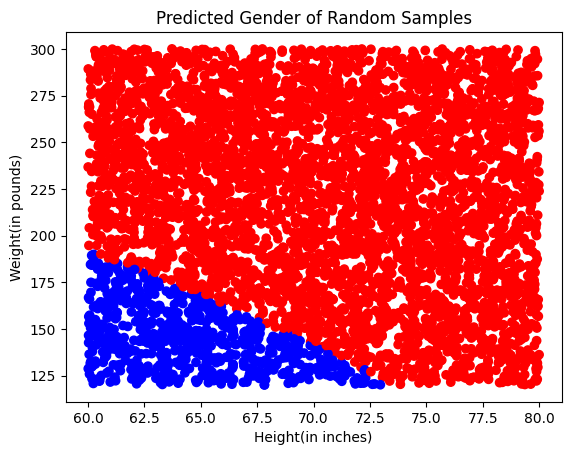

In [ ]:
################################
# Your code here
import random

random_heights = np.random.uniform(60,80,5000) # random heights in inches
random_weights = np.random.uniform(120,300,5000) # random heights in pounds
random_data = pd.DataFrame({'Height': random_heights, 'Weight': random_weights})

predict_gender = gender_model.predict(random_data) # predicting gender using gender model

random_data['Gender'] = predict_gender # adding Gender to dataframe

#random_data.plot(kind="scatter", x= "Height", y="Weight", c=random_data.Gender.map(colors))

plt.scatter(random_data.Height, random_data.Weight, c=random_data.Gender.map(colors))
plt.title("Predicted Gender of Random Samples")
plt.xlabel("Height(in inches)")
plt.ylabel("Weight(in pounds)")
plt.show()
